# Import libraries

In [1]:
# General
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Modelling Helpers:
from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Imputer, LabelEncoder

# Evaluation metrics for Regression 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import classification_report,confusion_matrix
print("Setup complete...")

Setup complete...


# Load data

In [2]:
data = pd.read_csv('Toddler Autism dataset July 2018.csv')
data.shape

(1054, 19)

# Data Preparation

In [3]:
data.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

### Remove unnesscary columns

In [4]:
data.drop(['Case_No','Who completed the test','Qchat-10-Score'],axis=1, inplace=True)

In [5]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,f,middle eastern,yes,no,No
1,1,1,0,0,0,1,1,0,0,0,36,m,White European,yes,no,Yes
2,1,0,0,0,0,0,1,1,0,1,36,m,middle eastern,yes,no,Yes
3,1,1,1,1,1,1,1,1,1,1,24,m,Hispanic,no,no,Yes
4,1,1,0,1,1,1,1,1,1,1,20,f,White European,no,yes,Yes


### One hot coding

In [6]:
le = LabelEncoder()
columns = ['Ethnicity','Family_mem_with_ASD','Class/ASD Traits ','Sex','Jaundice']
for col in columns:
    data[col] = le.fit_transform(data[col])
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,0,8,1,0,0
1,1,1,0,0,0,1,1,0,0,0,36,1,5,1,0,1
2,1,0,0,0,0,0,1,1,0,1,36,1,8,1,0,1
3,1,1,1,1,1,1,1,1,1,1,24,1,0,0,0,1
4,1,1,0,1,1,1,1,1,1,1,20,0,5,0,1,1


### Split data into X & Y

In [7]:
X = data.drop(['Class/ASD Traits '], axis = 1)
Y = data['Class/ASD Traits ']

### Split data into train - test set

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 7)

# Random Forest Classifier

### Initialize models

In [18]:
rfc = RandomForestClassifier(n_estimators=500)

### Train - Test Split

In [19]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Predict

In [20]:
pred = rfc.predict(x_test)

### Model Evaluation

In [21]:
print("Accuracy:", accuracy_score(y_test,pred))

Accuracy: 0.957345971563981


In [22]:
print(confusion_matrix(y_test,pred))

[[ 53   9]
 [  0 149]]


In [23]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        62
           1       0.94      1.00      0.97       149

   micro avg       0.96      0.96      0.96       211
   macro avg       0.97      0.93      0.95       211
weighted avg       0.96      0.96      0.96       211



### Feature Importance

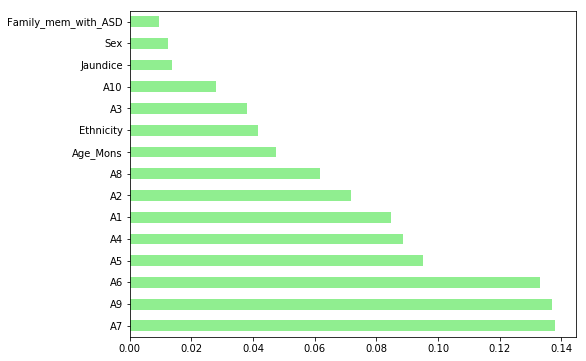

In [26]:
ax = (pd.Series(rfc.feature_importances_, index=X.columns)
   .nlargest(19)
   .plot(kind='barh', figsize=(8,6), color='lightgreen'))
plt.show()

### Hyper Parameter tuning with Cross Validation

In [27]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=100, stop = 2000, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_sample_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf': min_sample_leaf,
               'bootstrap' : bootstrap
              }

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv=5, error_score= np.nan, 
                               verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 39.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=

In [29]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': True}

In [28]:
from sklearn.ensemble import RandomForestClassifier
model_random = rf_random.best_estimator_
model_random.fit(x_train, y_train)
predictions_random = model_random.predict(x_test)

In [31]:
print("Accuracy:",accuracy_score(y_test, predictions_random))

Accuracy: 0.9478672985781991


In [32]:
print(classification_report(y_test, predictions_random))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        62
           1       0.93      1.00      0.96       149

   micro avg       0.95      0.95      0.95       211
   macro avg       0.97      0.91      0.93       211
weighted avg       0.95      0.95      0.95       211



In [34]:
f1_score(y_test, predictions_random, average='micro')

0.9478672985781991

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap' : [True],
    'max_depth' : [8, 10, 12, 14],
    'max_features' : ['sqrt'],
    'min_samples_leaf' : [1, 3, 4],
    'min_samples_split' : [7, 10, 12],
    'n_estimators' : [250, 275, 300, 325]
    
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv=5, n_jobs = -1, error_score=np.nan, verbose = 2)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 15.9min finished


GridSearchCV(cv=5, error_score=nan,
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [8, 10, 12, 14], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 4], 'min_samples_split': [7, 10, 12], 'n_estimators': [250, 275, 300, 325]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [ ]:
grid_search.best_params_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_grid = grid_search.best_estimator_
model_grid.fit(x_train, y_train)
predictions_grid = model_grid.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions_grid))

In [ ]:
print(classification_report(y_test, predictions_grid))